# COSC 130 - Homework 07

### Malcolm Nichols

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n = len(x)

mean = np.sum(x) / n
diff = x - mean

var = np.sum(diff**2) / (n - 1)

print(f'Sample Mean:     {mean}')
print(f'Sample Variance: {var}')

Sample Mean:     16.6
Sample Variance: 25.6


In [3]:
mean_np = np.mean(x)
var_np = np.var(x, ddof = 1)

print(f'Sample Mean:     {mean_np}')
print(f'Sample Variance: {var_np}')

Sample Mean:     16.6
Sample Variance: 25.6


## Problem 2: Scoring a Regression Model

In [4]:
def find_sse(true_y, pred_y):
    sse = np.sum((true_y - pred_y) ** 2)
    return sse

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

print(f'Model 1 SSE: {sse_1:.2f}')
print(f'Model 2 SSE: {sse_2:.2f}')

Model 1 SSE: 22.66
Model 2 SSE: 19.90


## Part 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y, pred_y):
    n = len(true_y)
    acc = np.sum(true_y == pred_y) / n
    return acc

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N',
                      'N','N', 'N', 'P', 'P', 'N', 'N','N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N',
                      'N', 'N', 'P', 'P', 'P', 'N', 'N','N', 'P', 'N'])

acc = find_accuracy(true_diag, pred_diag)
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.75


In [8]:
true_labels = np.array([ 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
                         'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array([ 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
                         'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])

acc2 = find_accuracy(true_labels, pred_labels)
print(f'Model Accuracy: {acc2}')

Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    classes = np.unique(true_y)
    acc = find_accuracy(true_y, pred_y)
    TP = np.sum((true_y == classes[1]) & (pred_y == classes[1]))
    FP = np.sum((true_y == classes[0]) & (pred_y == classes[1]))
    TN = np.sum((true_y == classes[0]) & (pred_y == classes[0]))
    FN = np.sum((true_y == classes[1]) & (pred_y == classes[0]))
    
    pos_prec = TP / (TP + FP)
    pos_recall = TP / (TP+ FN)
    neg_prec = TN / (TN + FN)
    neg_recall = TN / (TN + FP)
    
    print(f'Positive Class:     {classes[1]}')
    print(f'Negative Class:     {classes[0]}')
    print()
    print(f'Accuracy:           {acc:.4f}')
    print(f'Positive Precision: {pos_prec:.4f}')
    print(f'Positive Recall:    {pos_recall:.4f}')
    print(f'Negative Precision: {neg_prec:.4f}')
    print(f'Negative Recall:    {neg_recall:.4f}')

In [10]:
classification_report(true_diag, pred_diag)

Positive Class:     P
Negative Class:     N

Accuracy:           0.7500
Positive Precision: 0.5556
Positive Recall:    0.8333
Negative Precision: 0.9091
Negative Recall:    0.7143


In [11]:
classification_report(true_labels, pred_labels)

Positive Class:     dog
Negative Class:     cat

Accuracy:           0.8750
Positive Precision: 0.8333
Positive Recall:    0.9091
Negative Precision: 0.9167
Negative Recall:    0.8462


## Problem 5: Transformation of Random Variables

In [12]:
np.random.seed(1)
X = np.random.normal(loc = 0, scale = 0.4, size = 25000)
Y = np.exp(X)

sample_mean_x = np.mean(X)
sample_std_x = np.std(X, ddof = 1)
sample_mean_y = np.mean(Y)
sample_std_y = np.std(Y, ddof = 1)

print(f'Sample Mean of X:     {sample_mean_x:.4f}')
print(f'Sample Std Dev of X:  {sample_std_x:.4f}')
print(f'Sample Means of Y:    {sample_mean_y:.4f}')
print(f'Sample Std Dev of Y:  {sample_std_y:.4f}')

Sample Mean of X:     0.0025
Sample Std Dev of X:  0.4002
Sample Means of Y:    1.0862
Sample Std Dev of Y:  0.4537


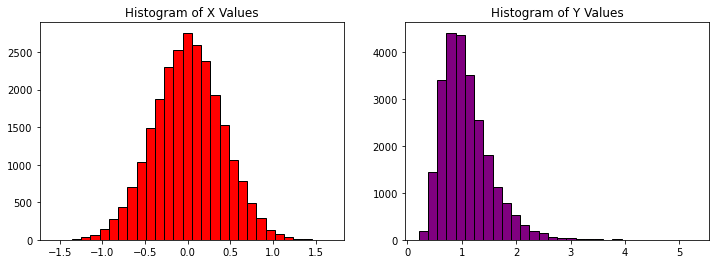

In [13]:
plt.figure(figsize = [12,4])
plt.subplot(1, 2, 1)
plt.hist(X, edgecolor = "k", color = "red", bins = 30)
plt.title("Histogram of X Values")  

plt.subplot(1, 2, 2)
plt.hist(Y, edgecolor = "k", color = "purple", bins = 30)
plt.title("Histogram of Y Values")
plt.show()

In [14]:
print(f'Probability that Y is less than 0.5: {np.mean(Y < 0.5)}')
print(f'Probability that Y is less than 1.0: {np.mean(Y < 1.0)}')
print(f'Probability that Y is less than 2.0: {np.mean(Y < 2.0)}')

Probability that Y is less than 0.5: 0.04104
Probability that Y is less than 1.0: 0.49688
Probability that Y is less than 2.0: 0.95736


## Problem 6: Stochastic Linear Relationships

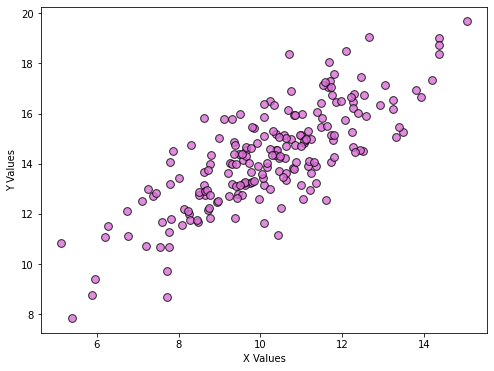

In [15]:
np.random.seed(1)
x_vals = np.random.normal(loc = 10, scale = 2, size = 200)
errors = np.random.normal(loc = 0, scale = 1.2, size = 200)
y_vals = 5.1 + 0.9*x_vals + errors

plt.figure(figsize = [8,6])
plt.scatter(x = x_vals, y = y_vals, s = 60, alpha = 0.8, color = 'orchid', edgecolor = 'k')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

In [16]:
diff_x = x_vals - np.mean(x_vals)
diff_y = y_vals - np.mean(y_vals)
top_r = np.sum(200 * (diff_x * diff_y))
bottom_r = np.sum(((200*(diff_x)**2) * (200*(diff_y)**2))**0.5)

r = top_r / bottom_r

print(f'Correlation between X and Y: {r}')

Correlation between X and Y: 0.9199144333179493


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [17]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['orange', 'lightgreen', 'aqua', 'pink']

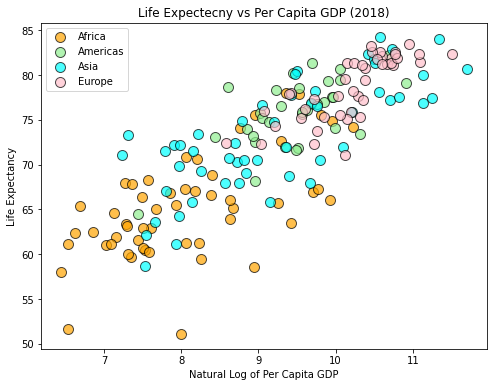

In [19]:
plt.figure(figsize = [8,6])
for i in range(0,len(continent_list)):
    #checking corresponding between continent, continent list and year 2018
    sel = (continent == continent_list[i]) & (year == 2018)
    plt.scatter(np.log(pcgdp[sel]), life_exp[sel], s = 100, alpha = 0.7, color = color_list[i], edgecolor = 'k',
               label = continent_list[i].title())
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectecny vs Per Capita GDP (2018)')
plt.legend()
plt.show()

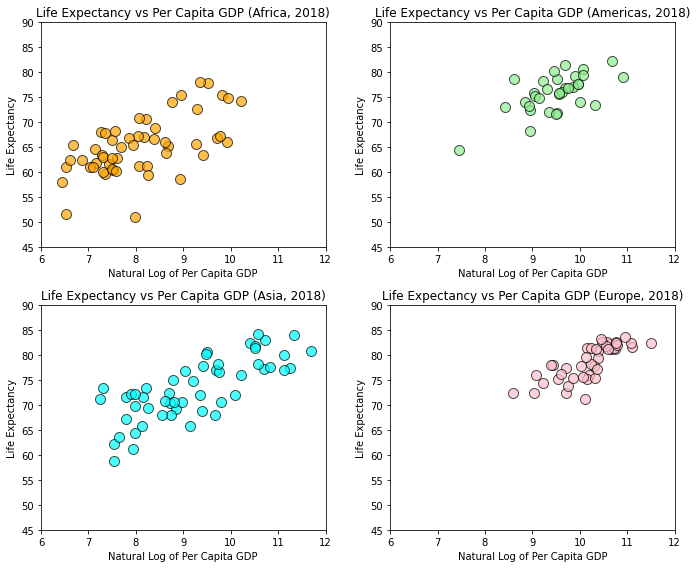

In [20]:
plt.figure(figsize = [10,8])
for i in range(0,len(continent_list)):
    #checking corresponding between continent, continent list and year 2018
    sel = (continent == continent_list[i]) & (year == 2018)
    plt.subplot(2,2,i + 1)
    plt.scatter(np.log(pcgdp[sel]), life_exp[sel], s = 100, alpha = 0.7, color = color_list[i], edgecolor = 'k')
    
    plt.xlim([6,12])
    plt.ylim([45,90])
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title('Life Expectancy vs Per Capita GDP (' + continent_list[i].title() + ', 2018)')
plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

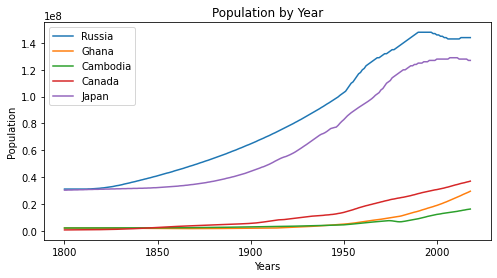

In [21]:
country_list = ['Russia', 'Ghana', 'Cambodia', 'Canada', 'Japan']
plt.figure(figsize = [8,4])
for i in range(0,len(country_list)):
    sel = country == country_list[i]
    plt.plot(year[sel], population[sel],label = country_list[i])
    
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.legend()
plt.show()

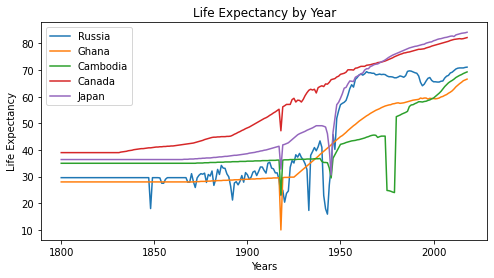

In [22]:
plt.figure(figsize = [8,4])
for i in range(0,len(country_list)):
    sel = country == country_list[i]
    plt.plot(year[sel], life_exp[sel],label = country_list[i])
    
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.legend()
plt.show()